In [2]:
%load_ext autoreload
%autoreload 2

In [54]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.transforms.functional import adjust_contrast
import matplotlib.pyplot as plt

In [13]:
from dataset import *

In [110]:
# Define a custom dataset class
class CorrectionImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.file_list[idx])
        image = Image.open(img_name)
        if self.transform:
            image = self.transform(image)
            

        return self.hist_fix(image), image
    
    def hist_fix(self, im):
        new_im = im.clone()
        print(torch.max(im[0]), torch.max(im[1]), torch.max(im[2]))
        print(torch.min(im[0]), torch.min(im[1]), torch.min(im[2]))
        
        new_im[0] = (im[0] - torch.min(im[0])) / (torch.max(im[0])-torch.min(im[0]))
        new_im[1] = (im[1] - torch.min(im[1])) / (torch.max(im[1])-torch.min(im[1]))
        new_im[2] = (im[2] - torch.min(im[2])) / (torch.max(im[2])-torch.min(im[2]))

        return new_im


tensor(1.) tensor(1.) tensor(1.)
tensor(0.) tensor(0.) tensor(0.)
tensor(0.)


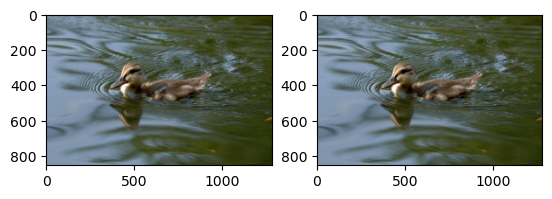

In [111]:
train_dataset = CorrectionImageDataset('data/training/GT_IMAGES', transform=ToTensor())
#validation_dataset = CorrectionImageDataset('data/validation/GT_IMAGES')

# test set must be done with the same data 
new_im, og_im = train_dataset[5]

fig, axs = plt.subplots(1,2)
axs[0].imshow(new_im.permute((1,2,0)))
axs[1].imshow(og_im.permute((1,2,0)))
print((new_im-og_im).sum())

In [112]:
len(train_dataset)

3535

In [113]:
len(validation_dataset)

NameError: name 'validation_dataset' is not defined